In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("../data/raw/train.csv")

In [5]:
df_test = pd.read_csv("../data/raw/test.csv")


In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
mapa_satisfaccion = {'neutral or dissatisfied': 0, 'satisfied': 1}
mapa_clase = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
mapa_viaje = {'Personal Travel': 0, 'Business travel': 1}

In [9]:
for dataset in [df, df_test]:
    # Limpieza de espacios (solo si es texto)
    # Convertimos a números usando map
    dataset['satisfaction'] = dataset['satisfaction'].astype(str).str.strip().map(mapa_satisfaccion)
    dataset['Class'] = dataset['Class'].astype(str).str.strip().map(mapa_clase)
    dataset['Type of Travel'] = dataset['Type of Travel'].astype(str).str.strip().map(mapa_viaje)

In [10]:
df = df.drop(columns=['Unnamed: 0','id','Departure Delay in Minutes','Customer Type','Gate location'])
df_test = df_test.drop(columns=['Unnamed: 0','id','Departure Delay in Minutes','Customer Type','Gate location'])

In [11]:
le = LabelEncoder()

In [12]:
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
print("Valores únicos en Class:", df['Class'].unique())  # Debería salir [1 2 0] o similar, NO nan
df.info()

Valores únicos en Class: [1 2 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Age                                103904 non-null  int64  
 2   Type of Travel                     103904 non-null  int64  
 3   Class                              103904 non-null  int64  
 4   Flight Distance                    103904 non-null  int64  
 5   Inflight wifi service              103904 non-null  int64  
 6   Departure/Arrival time convenient  103904 non-null  int64  
 7   Ease of Online booking             103904 non-null  int64  
 8   Food and drink                     103904 non-null  int64  
 9   Online boarding                    103904 non-null  int64  
 10  Seat comfort                       103904 non-null  int64  
 11  Inflig

In [14]:
df_limpio = df.rename(columns= {'Gender': 'Genero',
                    'Age': 'Edad',
                    'Type of Travel': 'Tipo de viaje',
                    'Class': 'Clase',
                    'Flight Distance': 'Distancia del vuelo',
                    'Inflight wifi service': 'Servicio wifi a bordo',
                    'Departure/Arrival time convenient': 'Horario de salida/llegada conveniente',
                    'Ease of Online booking': 'Facilidad para reservar online',
                    'Online boarding': 'Embarque online',
                    'Food and drink': 'Comida y bebida',
                    'Seat comfort': 'Comodidad del asiento',
                    'Inflight entertainment': 'Entretenimiento a bordo',
                    'On-board service': 'Servicio a bordo',
                    'Leg room service': 'Servicio de espacio para las piernas',
                    'Baggage handling': 'Gestión del equipaje',
                    'Checkin service': 'Servicio de facturación',
                    'Inflight service': 'Servicios en vuelo', 
                    'Cleanliness': 'Limpieza',
                    'Arrival Delay in Minutes': 'Retraso en la llegada en minutos',
                    'satisfaction' : 'Satisfacción'}) 


df_test_limpio = df.rename(columns= {'Gender': 'Genero',
                    'Age': 'Edad',
                    'Type of Travel': 'Tipo de viaje',
                    'Class': 'Clase',
                    'Flight Distance': 'Distancia del vuelo',
                    'Inflight wifi service': 'Servicio wifi a bordo',
                    'Departure/Arrival time convenient': 'Horario de salida/llegada conveniente',
                    'Ease of Online booking': 'Facilidad para reservar online',
                    'Online boarding': 'Embarque online',
                    'Food and drink': 'Comida y bebida',
                    'Seat comfort': 'Comodidad del asiento',
                    'Inflight entertainment': 'Entretenimiento a bordo',
                    'On-board service': 'Servicio a bordo',
                    'Leg room service': 'Servicio de espacio para las piernas',
                    'Baggage handling': 'Gestión del equipaje',
                    'Checkin service': 'Servicio de facturación',
                    'Inflight service': 'Servicios en vuelo', 
                    'Cleanliness': 'Limpieza',
                    'Arrival Delay in Minutes': 'Retraso en la llegada en minutos',
                    'satisfaction' : 'Satisfacción'}) 

In [15]:
df_limpio.head()

,Genero,Edad,Tipo de viaje,Clase,Distancia del vuelo,Servicio wifi a bordo,Horario de salida/llegada conveniente,Facilidad para reservar online,Comida y bebida,Embarque online,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Gestión del equipaje,Servicio de facturación,Servicios en vuelo,Limpieza,Retraso en la llegada en minutos,Satisfacción
0,1,13,0,1,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,1,25,1,2,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,0,26,1,2,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,0,25,1,2,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,1,61,1,2,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [16]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Genero                                 103904 non-null  int64  
 1   Edad                                   103904 non-null  int64  
 2   Tipo de viaje                          103904 non-null  int64  
 3   Clase                                  103904 non-null  int64  
 4   Distancia del vuelo                    103904 non-null  int64  
 5   Servicio wifi a bordo                  103904 non-null  int64  
 6   Horario de salida/llegada conveniente  103904 non-null  int64  
 7   Facilidad para reservar online         103904 non-null  int64  
 8   Comida y bebida                        103904 non-null  int64  
 9   Embarque online                        103904 non-null  int64  
 10  Comodidad del asiento                  103904 non-null  

In [17]:
df_test_limpio.head()

,Genero,Edad,Tipo de viaje,Clase,Distancia del vuelo,Servicio wifi a bordo,Horario de salida/llegada conveniente,Facilidad para reservar online,Comida y bebida,Embarque online,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Gestión del equipaje,Servicio de facturación,Servicios en vuelo,Limpieza,Retraso en la llegada en minutos,Satisfacción
0,1,13,0,1,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,1,25,1,2,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,0,26,1,2,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,0,25,1,2,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,1,61,1,2,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


In [18]:
df_test_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Genero                                 103904 non-null  int64  
 1   Edad                                   103904 non-null  int64  
 2   Tipo de viaje                          103904 non-null  int64  
 3   Clase                                  103904 non-null  int64  
 4   Distancia del vuelo                    103904 non-null  int64  
 5   Servicio wifi a bordo                  103904 non-null  int64  
 6   Horario de salida/llegada conveniente  103904 non-null  int64  
 7   Facilidad para reservar online         103904 non-null  int64  
 8   Comida y bebida                        103904 non-null  int64  
 9   Embarque online                        103904 non-null  int64  
 10  Comodidad del asiento                  103904 non-null  

In [19]:
df_limpio['Satisfacción'].value_counts()

Satisfacción
0    58879
1    45025
Name: count, dtype: int64

In [20]:
df_limpio.describe()

,Genero,Edad,Tipo de viaje,Clase,Distancia del vuelo,Servicio wifi a bordo,Horario de salida/llegada conveniente,Facilidad para reservar online,Comida y bebida,Embarque online,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Gestión del equipaje,Servicio de facturación,Servicios en vuelo,Limpieza,Retraso en la llegada en minutos,Satisfacción
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,0.492541,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,15.178678,0.433333
std,0.499947,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.698682,0.495538
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,1.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000,1.000000


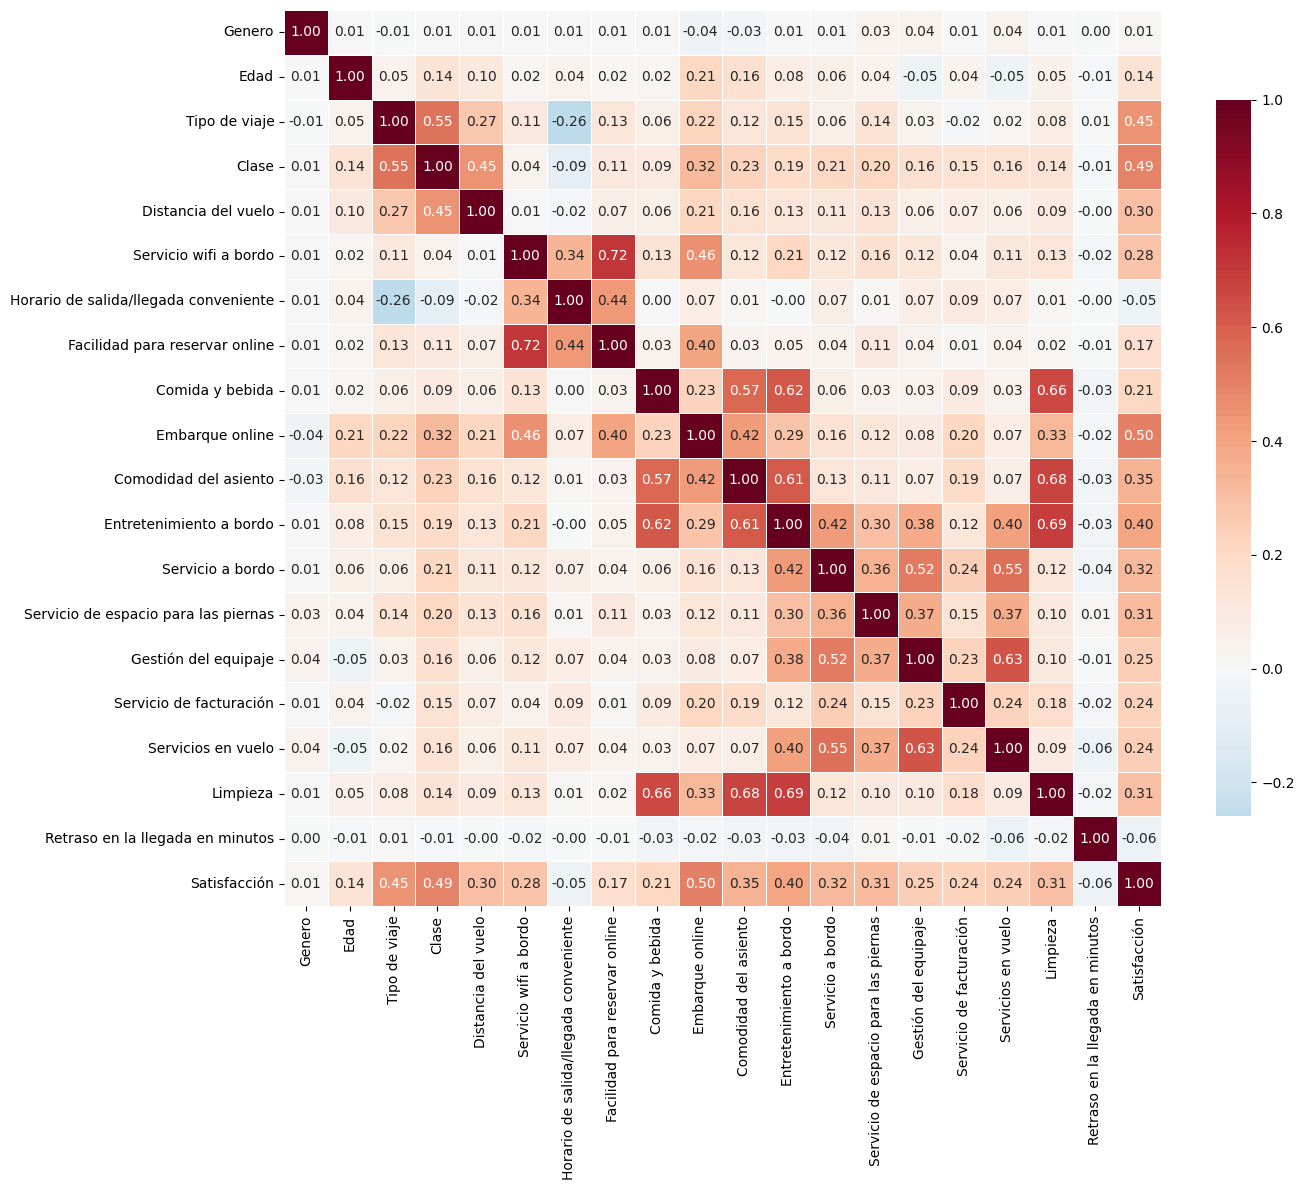

In [21]:
corr_matrix = df_limpio.corr(numeric_only=True)


# Configuración del Gráfico 

plt.figure(figsize=(14, 12))

# Creamos el heatmap con argumentos específicos para mejorar la visualización
sns.heatmap(
    corr_matrix,
    annot=True,       
    fmt=".2f",      
    cmap="RdBu_r",  
    center=0,       
    linewidths=0.5,   
    cbar_kws={"shrink": .8}) 
    

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [27]:
df_limpio.to_csv("../data/train/train_limpio.csv", index=False)

In [28]:
df_test_limpio.to_csv("../data/test/test_limpio.csv", index=False)